In [1]:
import numpy as np
from math import cos, sin, pi
import math

def get_rotation(x_angle, y_angle, z_angle):
        
    rot_x = np.array([[1, 0, 0],
                    [0, cos(x_angle), -sin(x_angle)],
                      [0, sin(x_angle),cos(x_angle)]])
    rot_y = np.array([[cos(y_angle), 0, sin(y_angle)],
                      [0, 1, 0],
                      [-sin(y_angle), 0, cos(y_angle)]])
    rot_z = np.array([[cos(z_angle),-sin(z_angle),0],
                      [sin(z_angle),cos(z_angle),0],
                      [0,0,1]])
        
    mul_x_y = np.dot(rot_x, rot_y)
    result = np.dot(mul_x_y, rot_z)
        
    return result

In [11]:
some_dot = np.zeros((3,3))

In [12]:
some_dot[0][0] = 1

In [13]:
np.dot(some_dot, get_rotation(0,pi/2,0))

array([[6.123234e-17, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00]])

In [14]:
from itertools import combinations
from itertools import permutations

In [15]:
angle_set = [[1,2,3],[1,1,1]]

In [16]:
for (x,y,z) in permutations([1,1,1]):
    print(x,y,z)

1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1


In [17]:
some_axis = np.zeros([1,3])

In [18]:
some_axis

array([[0., 0., 0.]])

In [19]:
some_axis + 2

array([[2., 2., 2.]])

In [20]:
some_axis = np.ones([3,1])

In [21]:
some_axis

array([[1.],
       [1.],
       [1.]])

In [22]:
some_axis * pi/2

array([[1.57079633],
       [1.57079633],
       [1.57079633]])

In [23]:
pi

3.141592653589793

In [24]:
def fill_rotations():
        '''Predefine the rotation matrices
        for data augmentation of the complexes
        '''
        
        rotation_matrices = []
        
        # Add the rotations around the primal axices
        # for n*pi/4 angles 
        for x in range(3):
            for n in range(1, 8):
                axis = np.zeros(3)
                angle = n * (pi/4)
                axis[x] = 1
                rotation_matrices.append(get_rotation_matrix(axis, angle))
                
        # Add the rotations around the four space diagonals
        # for n*pi/3 angles
#         space_axices = np.array([[1,1,-1],[1,1,1],[1,-1,-1],[1,-1,1]])
        
#         for axis in space_axices:
#             for n in range(1, 6):
#                 angle = n*(pi/3)
#                 rotation_matrices.append(get_rotation_matrix(axis, angle))
                
        return rotation_matrices

In [25]:
def get_rotation_matrix(axis, angle):
        '''Rotation matrix for any angle 
        around any axis
        
        angle should be in range from [-1, 1] 
        '''
        
        # normalize the units of the rotation axis
        axis = axis / math.sqrt(np.dot(axis, axis))
        
        u1, u2, u3 = axis
        
        c = cos(angle)
        s = sin(angle)
        v = 1 - c
        rotation_matrix = np.array([[u1*u1*v + c,u1*u2*v - u3*s, u1*u3*v + u2*s],
                                    [u1*u2*v + u3*s, u2*u2*v + c, u2*u3*v - u1*s],
                                    [u1*u3*v - u2*s, u2*u3*v + u1*s, u3*u3*v + c]])
        return rotation_matrix

In [26]:
some_point = np.array([0,1,0])

In [27]:
matrix = get_rotation_matrix(np.array([1,0,0]), 3*pi/2)
result = np.dot(matrix, some_point)

In [28]:
result

array([ 0.0000000e+00, -1.8369702e-16, -1.0000000e+00])

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os 
import sys 
sys.path.append("~/Downloads/AkeFiles/Files/project/Sipga_project/chimera/")


In [32]:
data_path = os.path.abspath('preprocessed_data')
print(os.listdir(data_path))
val_path = data_path + '/' + "core_set.hdf"


FileNotFoundError: [Errno 2] No such file or directory: '/home/mussaa/Downloads/AkeFiles/Files/project_ver2/new_version/ProteinLigandPredictor/structured/tests/preprocessed_data'

In [26]:
'''
    Extracting some data for visualization part
'''
pass

In [21]:
def get_features_names():
    atom_classes = Constants.atom_classes.value
    '''
        the order of features in the data set
    '''
    features = []
        
    '''
        added the atom names 
    '''
    for index, (atom_num, name) in enumerate(atom_classes):
        features.append(name)

    features += Constants.NAMED_PROPS.value
    features.append('molcode')
    features += Constants.smarts_labels.value

    return features

In [22]:
from enum import Enum
class Constants(Enum):
    NAMED_PROPS = ['hyb', 'heavyvalence', 'heterovalence',
                                'partialcharge']
    atom_classes = [
                (5, 'B'),
                (6, 'C'),
                (7, 'N'),
                (8, 'O'),
                (15, 'P'),
                (16, 'S'),
                (34, 'Se'),
                ([9, 17, 35, 53], 'halogen'),
                (([3, 4, 11, 12, 13] + list(range(19, 32))
                      + list(range(37, 51)) + list(range(55, 84))
                      + list(range(87, 104))), 'metal')
            ]

    SMARTS = [
                '[#6+0!$(*~[#7,#8,F]),SH0+0v2,s+0,S^3,Cl+0,Br+0,I+0]',
                '[a]',
                '[!$([#1,#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]',
                '[!$([#6,H0,-,-2,-3]),$([!H0;#7,#8,#9])]',
                '[r]'
            ]
    smarts_labels = ['hydrophobic', 'aromatic', 'acceptor', 'donor',
                             'ring']
    
    HDF_PATH =  os.path.join(os.pardir, "chimera/preprocessed_data/")

In [23]:
features_names = get_features_names()

In [24]:
import h5py
import numpy as np

affinity = []
coords = []
features = []
ids = []

index = 0


with h5py.File(val_path, 'r') as f:
    for pdb_id in f:
        index += 1
        ids.append(pdb_id)
        data_set = f[pdb_id]
        coords.append(data_set[:, :3])
        if index == 1:
            print(data_set[:,:3].shape)
        features.append(data_set[:, 3:])
        affinity.append(data_set.attrs['affinity'])


affinity = np.reshape(affinity, (-1, 1))


OSError: Unable to open file (unable to open file: name = '~/Downloads/AkeFiles/Files/project/Sipga_project/chimera/preprocessed_data/core_set.hdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [44]:
import matplotlib.pyplot as plt

columns = {name: i for i,name in enumerate(features_names)}
coords = np.array(coords)


def plot_boxes(complex_idx, rot_mat = None, box_indices = None,rot = None):
    
    fig = plt.figure(figsize=(8, 8))
    ft = features[complex_idx]
    ax = fig.add_subplot(111, projection='3d')
    prot_coord = coords[complex_idx][ft[:, columns['molcode']] == -1].T if rot_mat is None else np.dot(coords[complex_idx][ft[:, columns['molcode']] == -1], rot_mat).T
    lig_coord = coords[complex_idx][ft[:, columns['molcode']] == 1].T if rot_mat is None else np.dot(coords[complex_idx][ft[:, columns['molcode']] == 1], rot_mat).T
    mx,my,mz = prot_coord
    mz = np.append(mz, 20)
    mx = np.append(mx, 20)
    my = np.append(my, 20)
    print(mz.shape)
    print(mz.shape)
    ax.scatter(mx,my, mz,label='protein', c = 'r', s = 5)
    mx,my,mz = lig_coord
    ax.scatter(mx, my,  mz,label='ligand', c='b', s=20) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    
len(features)

2279

(579,)
(579,)
(579,)
(579,)


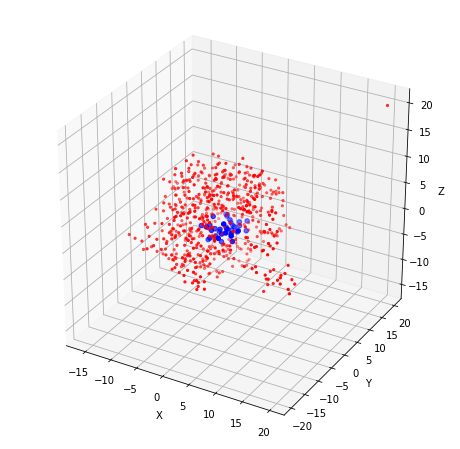

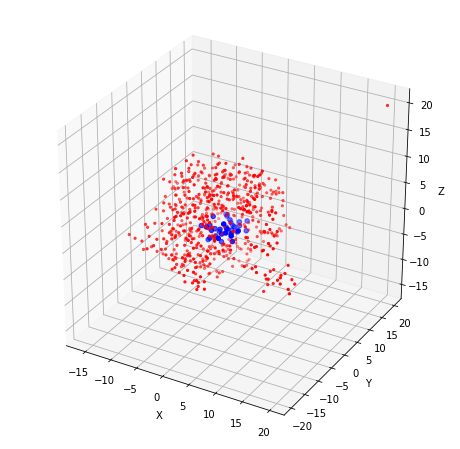

In [48]:
rotation_matrices = fill_rotations()
# rotation_matrices[0].shape

plot_boxes(0)
plot_boxes(0, get_rotation_matrix(np.array([1,1,1]), 0))

In [46]:
coords[0][features[0][:, columns['molcode']] == -1].shape

(578, 3)

In [2]:
import pandas as pd

In [3]:
# path_csv = "/home/mussaa/Downloads/AkeFiles/Files/project_ver2/new_version/ProteinLigandPredictor/structured/utils/processing/specific_protein/nr_bind.csv"
path_csv = "/home/mussaa/Downloads/AkeFiles/Files/project_ver2/new_version/ProteinLigandPredictor/structured/utils/processing/specific_protein/every_bind(2).csv"
# path_csv = "/home/mussaa/Downloads/AkeFiles/Files/project_ver2/new_version/ProteinLigandPredictor/structured/utils/processing/specific_protein/nr.csv"

In [4]:
pd.set_option('max_rows', 15)
data = pd.read_csv(path_csv, index_col = 0)

In [5]:
data.head(10)
# data.shape


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2.4.1.69,,,,,,,,,
3.4.11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.1.1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Family. Representative Entry is,4YV5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,SVR:B:207,valid,Kd,=,6.2,uM,Cc1ccc(cc1NC(=O)c2cccc(c2)NC(=O)Nc3cccc(c3)C(=...
NaN,NaN,NaN,SVR:A:205,valid,Kd,=,6.2,uM,Cc1ccc(cc1NC(=O)c2cccc(c2)NC(=O)Nc3cccc(c3)C(=...
NaN,NaN,NaN,SO4:B:202,invalid,NaN,NaN,NaN,NaN,[O-]S(=O)(=O)[O-]
NaN,NaN,NaN,SO4:B:201,invalid,NaN,NaN,NaN,NaN,[O-]S(=O)(=O)[O-]
NaN,NaN,NaN,SO4:A:201,invalid,NaN,NaN,NaN,NaN,[O-]S(=O)(=O)[O-]
NaN,NaN,NaN,SO4:B:205,invalid,NaN,NaN,NaN,NaN,[O-]S(=O)(=O)[O-]


In [6]:
data.rename(columns = {"Unnamed: 2": "Representative", "Unnamed: 5":"Metric", "Unnamed: 7": "Num", "Unnamed: 8":"Unit"}, inplace = True)
data.drop(["Unnamed: 1","Unnamed: 3","Unnamed: 4","Unnamed: 6", "Unnamed: 9"], axis = 1, inplace = True)

In [7]:
# data.iloc[2]
data = data.loc[(data["Representative"].notnull()) | (data["Metric"].notnull()) ].reset_index()
data.drop("2.4.1.69", axis = 1, inplace = True)
data.head(8)


,Representative,Metric,Num,Unit
0,4YV5,NaN,NaN,NaN
1,NaN,Kd,6.20,uM
2,NaN,Kd,6.20,uM
3,1HN4,NaN,NaN,NaN
4,NaN,Kd,0.15,mM
5,3QLM,NaN,NaN,NaN
6,NaN,Ki,15.80,uM
7,5G3N,NaN,NaN,NaN


In [8]:
data.head(17)

,Representative,Metric,Num,Unit
0,4YV5,NaN,NaN,NaN
1,NaN,Kd,6.200,uM
2,NaN,Kd,6.200,uM
3,1HN4,NaN,NaN,NaN
4,NaN,Kd,0.150,mM
5,3QLM,NaN,NaN,NaN
6,NaN,Ki,15.800,uM
...,...,...,...,...
10,1KVO,NaN,NaN,NaN
11,NaN,ic50,0.013,uM


In [9]:
value = ""

def put_representative(row):
    global value
    if isinstance(row.Representative, str):
        value = row.Representative
    else:
        row.Representative = value
    return row
    
data = data.apply(put_representative, axis = 'columns')

data.head()
print("READY")

READY


In [10]:
data.drop_duplicates(inplace = True)
print("READY")

READY


In [11]:
data.head()
data.drop(data[data.Metric.isnull()].index.values, axis = 0, inplace = True)
print("READY")

READY


In [12]:
data.head()
print("READY")

READY


In [13]:
import os 

pdb_path = "/home/mussaa/Downloads/AkeFiles/Files/project_ver2/new_version/ProteinLigandPredictor/structured/utils/processing/specific_protein/list"

def unique_pdb(path):
    unique_pdb = set()
    current_path = os.path.abspath(path)

    with open(current_path, 'r') as file_reader:
        for line in file_reader:
            unique_pdb.add(line[:4])

    return unique_pdb

unique = unique_pdb(pdb_path)
unique = list(unique)
print("READY")

READY


In [14]:
# def find_match():
#     count = 0
#     global unique
    
#     for pdb in unique:
#         data.


data.loc[data.Representative.isin(unique)].Metric.value_counts()


ic50    862
Ki      188
Kd      138
Name: Metric, dtype: int64

In [15]:
print(len(unique), data.shape)

3362 (9403, 4)


In [16]:
data.head(100)

,Representative,Metric,Num,Unit
1,4YV5,Kd,6.200,uM
4,1HN4,Kd,0.150,mM
6,3QLM,Ki,15.800,uM
8,5G3N,ic50,0.012,uM
11,1KVO,ic50,0.013,uM
18,1J1A,ic50,0.029,uM
21,4UY1,ic50,20.000,uM
...,...,...,...,...
277,3F5L,Ki,0.191,mM
280,2O9R,Ki,21.000,mM


In [17]:
data = data.reset_index()


In [18]:
data.drop("index", axis = "columns", inplace = True)

In [19]:
data.head(15)

,Representative,Metric,Num,Unit
0,4YV5,Kd,6.200000,uM
1,1HN4,Kd,0.150000,mM
2,3QLM,Ki,15.800000,uM
3,5G3N,ic50,0.012000,uM
4,1KVO,ic50,0.013000,uM
5,1J1A,ic50,0.029000,uM
6,4UY1,ic50,20.000000,uM
7,5G3M,ic50,24.000000,uM
8,1JQ9,Kd,3.570000,nM
9,2QVD,Kd,0.000001,M


In [36]:
data.loc[data.Representative.isin(unique)].Metric.value_counts().loc[["ic50", "Kd"]]

ic50    862
Kd      138
Name: Metric, dtype: int64

In [21]:
data.to_csv(os.path.abspath("formatted_binding.csv"))